# Project title: Analysis of Corrosion Rate % in Gas Pipelines Considering the operating Parameters (Gas Flowrate and Water Cut %)

## Analysis Goal:

The objective of my project is to analysis a given data related to many pipes that transport a gas with their operating parameters (flowrate and water %) to identify the effects of operating parameters on the corrosion rate and figure out which one of these factors has the most effect on corrosion rate in the pipes

## The measurement:

I am studying the corrosion rate in the pipes which is affected by the flowrate and the % of water which is transported with gas.  

## Analysis:

## Initially, I plotted the water cut % versus corrosion rate % to find out if there is a linear relationship between the two . Then I applied the Python’s OLS linear regression model package:

The slope number 1 is -0.49
The intercept is 3.82
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     29.33
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.72e-07
Time:                        13:45:15   Log-Likelihood:                -222.78
No. Observations:                 110   AIC:                             449.6
Df Residuals:                     108   BIC:                             455.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1

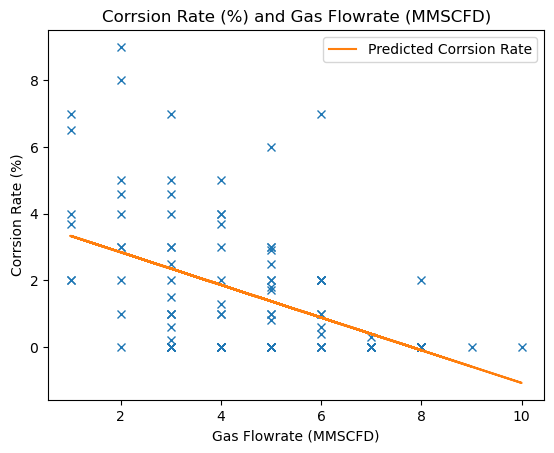

In [12]:
import numpy as np
import matplotlib.pyplot as plt

file="Project1Data.csv"

f= np.genfromtxt(file, delimiter=",", skip_header=1)

pipe_number=f[:,0]
gas_flowrate=f[:,1] 
water_cut_perecent=f[:,2]
corrsion_rate=f[:,3]


x1=gas_flowrate
y=corrsion_rate

X1=np.column_stack((x1,np.ones_like(x1)))                 
coef=np.linalg.lstsq(X1,y, rcond=None)[0]      

a=coef[0]
b=coef[1]

print(f'The slope number 1 is {a:0.2f}')
print(f'The intercept is {b:0.2f}')

plt.plot(gas_flowrate,corrsion_rate,'x')
plt.xlabel('Gas Flowrate (MMSCFD)')
plt.ylabel('Corrsion Rate (%)')
plt.title('Corrsion Rate (%) and Gas Flowrate (MMSCFD)')
predicted_y = -0.49*x1+3.82;
plt.plot(x1, predicted_y, label = "Predicted Corrsion Rate");
plt.legend();

import statsmodels.api as sm
model = sm.OLS(y,X1).fit()

# erase the add constant above to remove the intercept of the model.

print(model.summary())



## Then, I plotted gas flowrate versus the corrosion rate % and I applied the Python’s OLS linear regression model package:

The slope number 1 is 0.14
The intercept is -0.41
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     92.15
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.80e-16
Time:                        13:45:17   Log-Likelihood:                -202.06
No. Observations:                 110   AIC:                             408.1
Df Residuals:                     108   BIC:                             413.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1

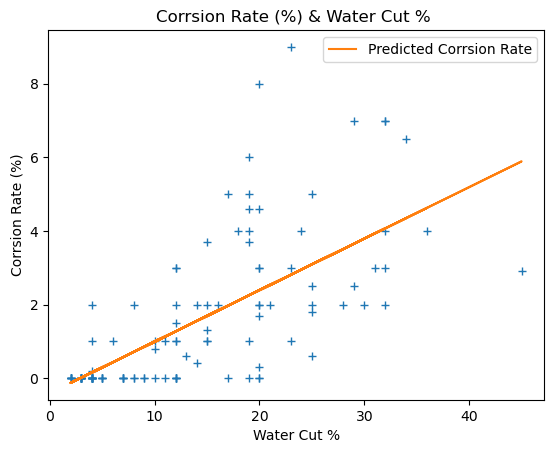

In [13]:
import numpy as np
import matplotlib.pyplot as plt


x2=water_cut_perecent
y=corrsion_rate

X2=np.column_stack((x2,np.ones_like(x2)))                 
coef=np.linalg.lstsq(X2,y, rcond=None)[0]      

a=coef[0]
b=coef[1]

print(f'The slope number 1 is {a:0.2f}')
print(f'The intercept is {b:0.2f}')

plt.plot(water_cut_perecent,corrsion_rate,'+')
plt.xlabel('Water Cut %')
plt.ylabel('Corrsion Rate (%)')

plt.title('Corrsion Rate (%) & Water Cut % ')

predicted_y = 0.14*x2-0.41;
plt.plot(x2, predicted_y, label = "Predicted Corrsion Rate");
plt.legend();
import statsmodels.api as sm
model = sm.OLS(y,X2).fit()
print(model.summary())

# Then I used Linear models considering two factors (Flowrate and Water_cut%)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

file="Project1Data.csv"

f= np.genfromtxt(file, delimiter=",", skip_header=1)

pipe_number=f[:,0]
gas_flowrate=f[:,1] 
water_cut_perecent=f[:,2]
corrsion_rate=f[:,3]


gas_flowrate=gas_flowrate.astype(int);

water_cut_perecent=water_cut_perecent.astype(int);

x1=gas_flowrate
x2=water_cut_perecent
y=corrsion_rate

X=np.column_stack((x1,x2,np.ones_like(x1)))
                 
coef=np.linalg.lstsq(X,y, rcond=None)[0]      

a=coef[0]
b=coef[1]
c=coef[2]

#plt.plot(water_cut_perecent,gas_flowrate,'+')

print(f'The slope number 1 is {a:0.2f}')
print(f'The slope number 2 is {b:0.2f}')
print(f'The intercept is {c:0.2f}')

The slope number 1 is -0.37
The slope number 2 is 0.13
The intercept is 1.43


In [15]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()

# erase the add constant above to remove the intercept of the model.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     72.08
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.49e-20
Time:                        13:45:19   Log-Likelihood:                -189.07
No. Observations:                 110   AIC:                             384.1
Df Residuals:                     107   BIC:                             392.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3655      0.068     -5.341      0.0

# Then, I used Linear models considering two factors with interactions(Flowrate and Water Cut%): 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

file="Project1Data.csv"

f= np.genfromtxt(file, delimiter=",", skip_header=1)

pipe_number=f[:,0]
gas_flowrate=f[:,1] 
water_cut_perecent=f[:,2]
corrsion_rate=f[:,3]


gas_flowrate=gas_flowrate.astype(int);
water_cut_perecent=water_cut_perecent.astype(int);

inter=gas_flowrate*water_cut_perecent

x1=gas_flowrate
x2=water_cut_perecent
it=inter
y=corrsion_rate

X=np.column_stack((x1,x2,it,np.ones_like(x1)))
                 
coef=np.linalg.lstsq(X,y, rcond=None)[0]      

a=coef[0]
b=coef[1]
c=coef[2]
d=coef[3]


print(f'The slope number 1 is {a:0.2f}')
print(f'The slope number 2 is {b:0.2f}')
print(f'The slope number 3 is {c:0.2f}')
print(f'The intercept is {d:0.2f}')

The slope number 1 is -0.02
The slope number 2 is 0.24
The slope number 3 is -0.03
The intercept is -0.15


In [17]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()

# erase the add constant above to remove the intercept of the model.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     60.12
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           8.80e-23
Time:                        13:45:22   Log-Likelihood:                -181.34
No. Observations:                 110   AIC:                             370.7
Df Residuals:                     106   BIC:                             381.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0234      0.107     -0.219      0.8